In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data=data.iloc[:,:-2]

In [5]:
data.dtypes

mpg     float64
cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
dtype: object

In [7]:
data['hp']=pd.to_numeric(data['hp'],errors='coerce')

In [8]:
data.isna().sum()

mpg     0
cyl     0
disp    0
hp      6
wt      0
acc     0
yr      0
dtype: int64

In [10]:
data['hp']=data['hp'].replace(np.nan,data['hp'].mean())

In [11]:
data.isna().sum()

mpg     0
cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
dtype: int64

In [12]:
from scipy.stats import zscore

In [21]:
x=data.iloc[:,1:]
y=data[['mpg']]

In [24]:
x_scaled=x.apply(zscore)

In [27]:
cov=np.cov(x_scaled,ddof=True,rowvar=False)
print(cov)

[[ 1.00251889  0.95311615  0.84105256  0.89827376 -0.50669259 -0.34962425]
 [ 0.95311615  1.00251889  0.89589723  0.93517383 -0.54505356 -0.37109656]
 [ 0.84105256  0.89589723  1.00251889  0.86274199 -0.6859827  -0.4126879 ]
 [ 0.89827376  0.93517383  0.86274199  1.00251889 -0.41850885 -0.30733654]
 [-0.50669259 -0.54505356 -0.6859827  -0.41850885  1.00251889  0.28886274]
 [-0.34962425 -0.37109656 -0.4126879  -0.30733654  0.28886274  1.00251889]]


In [39]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
for i in range(1,7):
    pca=PCA(n_components=i)
    pca.fit(x_scaled)
    Z=linkage(x_scaled,metric='euclidean', method='average')
    print("Number of Components:{} :% variation explained : {}".format(i,pca.explained_variance_ratio_))

Number of Components:1 :% variation explained : [0.70820668]
Number of Components:2 :% variation explained : [0.70820668 0.13976718]
Number of Components:3 :% variation explained : [0.70820668 0.13976718 0.11221106]
Number of Components:4 :% variation explained : [0.70820668 0.13976718 0.11221106 0.02289796]
Number of Components:5 :% variation explained : [0.70820668 0.13976718 0.11221106 0.02289796 0.01088701]
Number of Components:6 :% variation explained : [0.70820668 0.13976718 0.11221106 0.02289796 0.01088701 0.00603011]


In [46]:
from sklearn.metrics import silhouette_score

In [51]:
for i in range(2,7):
    model=AgglomerativeClustering(n_clusters=i,affinity='euclidean',  linkage='average')
    model.fit(x_scaled)
    print('Scores', silhouette_score(x_scaled,model.labels_))

Scores 0.5050654051040301
Scores 0.3537259636535596
Scores 0.326134260866034
Scores 0.30069779686243137
Scores 0.2706637369063933


In [52]:
pca=PCA(n_components=2)
pca.fit(x_scaled)

PCA(n_components=2)

In [53]:
pca.explained_variance_

array([4.25994348, 0.84071546])

In [54]:
pca.components_

array([[ 0.45526182,  0.46934018,  0.46261026,  0.44640084, -0.32468348,
        -0.23185157],
       [ 0.18219422,  0.16027323,  0.0151916 ,  0.25624036,  0.21010549,
         0.91163783]])

In [55]:
pca.explained_variance_ratio_

array([0.70820668, 0.13976718])

<BarContainer object of 2 artists>

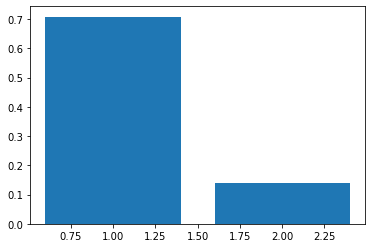

In [56]:
plt.bar(range(1,3),pca.explained_variance_ratio_)

In [58]:
new_x=pca.transform(x_scaled)

In [62]:
from sklearn.linear_model import  LinearRegression
lr=LinearRegression()
lr.fit(new_x,y)
lr.score(new_x,y)

0.7214027020773105

In [66]:
lr=LinearRegression()
lr.fit(x_scaled,y)
lr.score(x_scaled,y)

0.8087041327986043